In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-06 19:34:41.546404: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-06 19:34:41.581756: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-06 19:34:42.082408: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 


#######################################################

#     Este programa quando executado usa dados reconstruídos

#     Para refazer as previsões, tem que apagar os dados dos anos para prever na planilha

########################################################

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/André - RJ_Reconstrucao_Sparidae_2024_08_15.xlsx')
df_Pargo_art = pd.DataFrame(df[['Ano','Pargo_art']])

dados = df_Pargo_art.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1967,1968,1969,1970,1971,1972,1972,1974,1975,1990,1991,1992,1993,1994,1995,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Pargo_art'].values
dados.head()

,Ano,Pargo_art
16,1966,168.497498
26,1976,244.030853
27,1977,50.123291
28,1978,21.000000
29,1979,59.000000


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [7]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=450, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Pargo/pesos pesca art/.weights.h5', overwrite=True)

Epoch 1/450


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0090  
Epoch 2/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9894 
Epoch 3/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9188 
Epoch 4/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9467 
Epoch 5/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8869 
Epoch 6/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7595 
Epoch 7/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7997 
Epoch 8/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7644 
Epoch 9/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7086 
Epoch 10/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7278 
Epoch 11/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6661 
Epoch 12/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6061 
Epoch 13/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5555 
Epoch 14/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5200 
Epoch 15/450
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4580 
Epoch 16/450
2/2 ━━━━━━━━━━━━━

In [8]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Pargo/pesos pesca art/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[181.84589]
 [179.2994 ]
 [176.72415]
 [174.14232]
 [171.56049]
 [169.0794 ]
 [166.6347 ]
 [164.19003]
 [161.97089]
 [159.90814]
 [157.80746]
 [155.7312 ]
 [153.62485]
 [151.51859]
 [149.54987]
 [147.9442 ]
 [144.40372]
 [142.48607]
 [140.52774]
 [138.61166]
 [136.46484]
 [133.85104]
 [133.85104]
 [127.63905]
 [123.12584]
 [639.4448 ]
 [512.7195 ]
 [391.1868 ]
 [271.9333 ]
 [163.80457]
 [ 70.44548]
 [ 58.2502 ]]


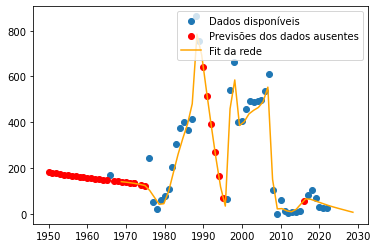

In [9]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

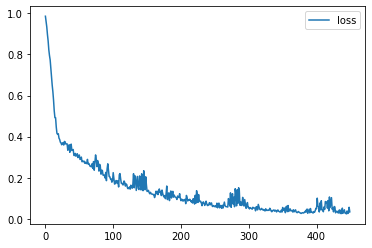

In [10]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [11]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*pesca_std + pesca_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0


df_preenchido = pd.DataFrame({'Ano':anos, 'Pargo_art':prev_continua.flatten()})


df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Pargo/Interpolações e Extrapolações Pargo_art.xlsx')

df_preenchido

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Ano,Pargo_art
0,1950,181.845886
1,1951,179.299393
2,1952,176.724152
3,1953,174.142319
4,1954,171.560486
...,...,...
62,2012,10.161896
63,2013,10.030640
64,2014,20.192505
65,2015,39.407135
